<h1 align="center " > heart atacck prediction </h1>

### Project Content
1. [Introduction](#1)
    * 1.1 [Examining the prject Topic](#2)
    * 1.2 [Variable in dataset](#3)
2. [First Organization](#4)
    * 2.1 [Importing the libraries](#5)
    * 2.2 [Loading the data](#6)
    * 2.3 [Analysis on the data](#7)
3. [preparation for EDA](#8)
    * 3.1 [Examine the missing value](#9)
    * 3.2 [Examine unique value](#10)
    * 3.3 [Seprating the valiable](#11)
    * 3.4 [Examining the statistic of Variable](#12)
4. [Exporatory Data Analysis](#13)
    * 4.1 [uni-variate analysis](#14)
        * 4.1.1 [Numerical variable Displot analysis](#15)
        * 4.1.2 [catagorical  variable pie chart analysis](#16)
    * 4.2 [bi-variate analysis](#17)
        * 4.2.1 [numeric-output variable Corelation analysis](#18)
        * 4.2.2 [categorical - output variable count plot analysis](#19)
        * 4.2.3 [Examining corrrelation among the numerical features with pair plot](#20)
        * 4.2.4 [Feature Scaling with roustscaler method](#21)
        * 4.2.5 [Creating new dataFrame with melt function](#22)
        * 4.2.6 [Numerical - Catagorical variable analysis with swarmplot](#23)
        * 4.2.7 [Numerical - Catagorical variable analysis with boxplot](#24)
        * 4.2.8 [Relation between allvariable with heatmap analysis](#25)
5. [Preparation for modelling](#26)
    * 5.1 [droping columns with low corelation](#27)
    * 5.2 [handling with outliear](#28)
    * 5.3 [Transformation operation on unsymmetrical data](#29)
    * 5.4 [One hotencoding on categorical variable](#30)
    * 5.5 [RobustScaling](#31)
    * 5.6 [Split data in train and test](#32)
6. [Modelling](#33)
    * 6.1 [Logestic regression](#34)
        * 6.1.1 [Hyperparameter tuning](#35)
    * 6.2 [Decision Tree Classifier](#36)
    * 6.3 [Suport vector classifier](#37)
    * 6.4 [Random Forest Classifier](#38)
7. [Porject conclusion](#39)
    

### 1.Introduction<a id =1 ></a>

#### 1.1 Examining the prject Topic<a id =2></a>

#### What is a heart attack?
#### heart attacks are caused by a blood clot that blocks one of the coronary arteries. The coronary arteries bring blood and oxygen to the heart. If the blood flow is blocked, the heart is starved of oxygen and heart cells die.

#### what are the symptoms of heart attack?

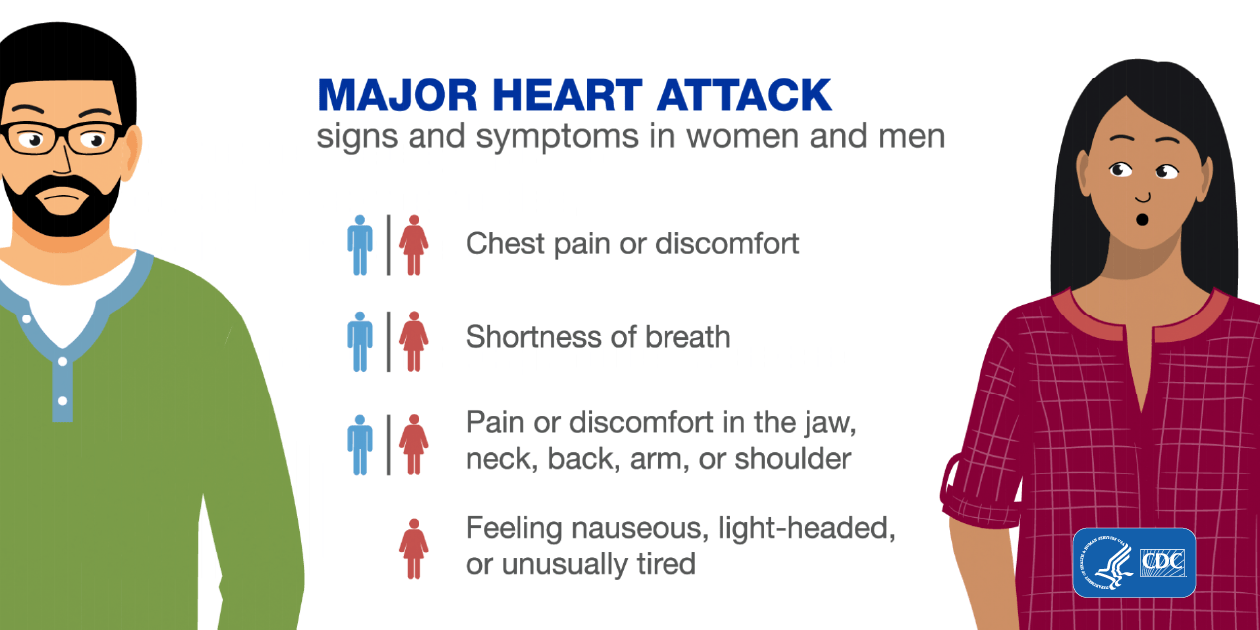

#### 1.2 Variable in dataset<a id =3></a>
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

### First organization<a id = 4></a>

#### 2.1 Importing the libraries<a id = 5></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


#### 2.2 Loading the data<a id =6></a>

In [2]:
data =pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

#### 2.3 Analysis on the data<a id =7></a>

In [3]:
#first five rows
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#rows and columns in datasets
data.shape

(303, 14)

In [5]:
#datatype in every columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 3. Preparation for EDA<a id =8></a>

#### 3.1 Examine the missing value<a id = 9></a>

In [6]:
#checking the null values
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<AxesSubplot:>

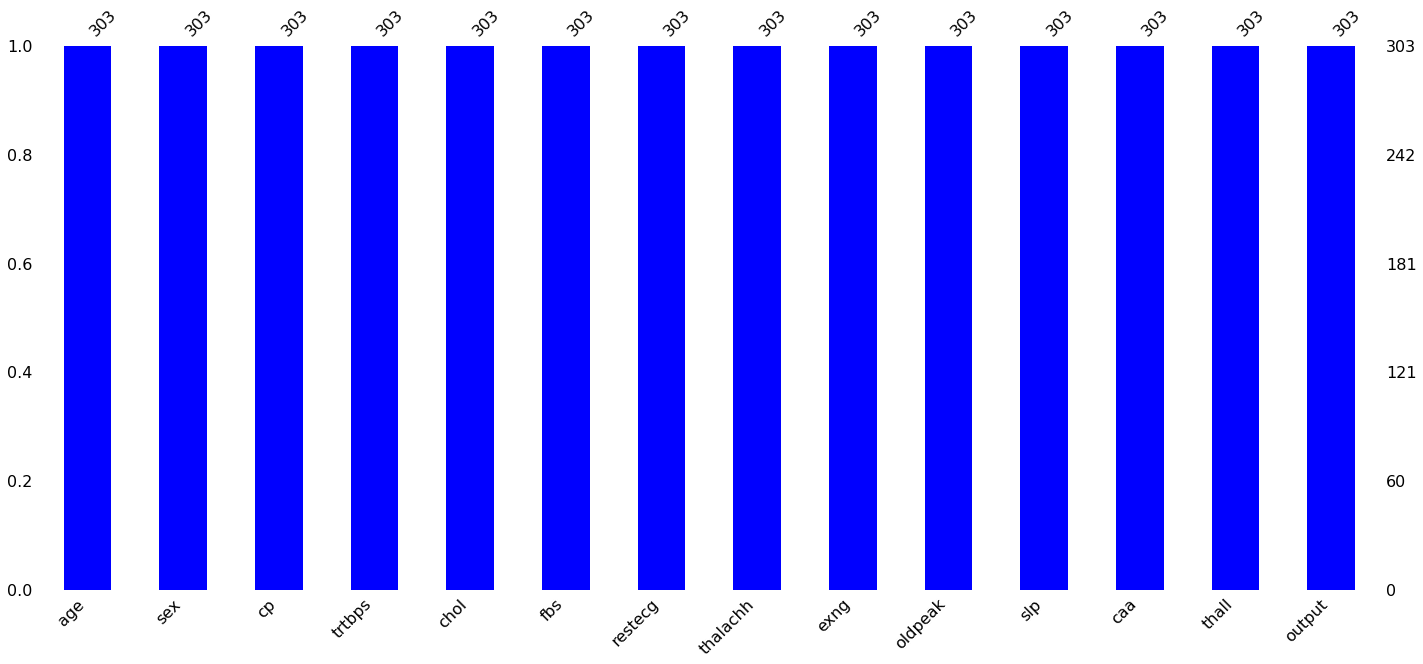

In [7]:
import missingno
missingno.bar(data ,color ="b")

#### 3.2 Examine unique value<a id = 10></a>

In [8]:
unique_val =[]
for i in data.columns:
    x=data[i].value_counts().count()
    unique_val.append(x)
pd.DataFrame(unique_val ,index = data.columns ,columns =["Total unique value"])

,Total unique value
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


#### 3.3 Seprating the valiable (categorical & numerical)<a id =11></a> 

In [9]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
cat_var =["sex","cp","fbs","restecg","exng","slp","caa","thall","output"]
num_var =["age","trtbps","chol","thalachh","oldpeak"]

#### 3.4 Examining the statistic of Variable<a id =12></a>

In [11]:
#describtion of datasets
data[num_var].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


### Exporatory Data Analysis<a id =13></a>

#### 4.1 Uni-variate analysis<a id =14></a>

##### 4.1.1 Numerical variable Displot analysis<a id =15></a>

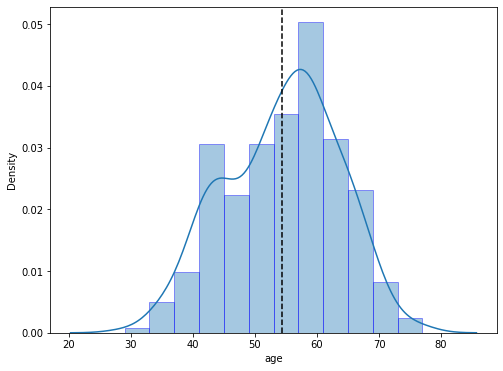

In [12]:
x ,y=plt.subplots(figsize =(8,6))
sns.distplot(data["age"], hist_kws =dict(linewidth =1,edgecolor ="b"),ax =y)
y.axvline(data["age"].mean(),color ="k",ls="--")

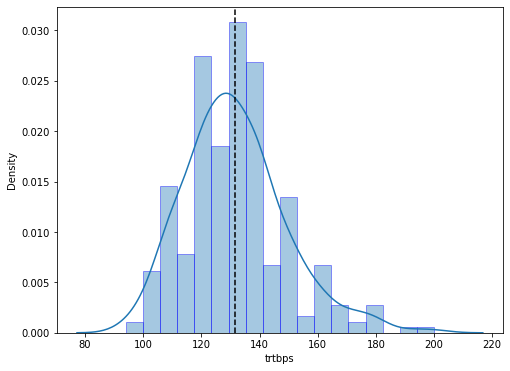

In [13]:
x ,y=plt.subplots(figsize =(8,6))
sns.distplot(data["trtbps"], hist_kws =dict(linewidth =1,edgecolor ="b"),ax =y)
y.axvline(data["trtbps"].mean(),color ="k",ls="--")

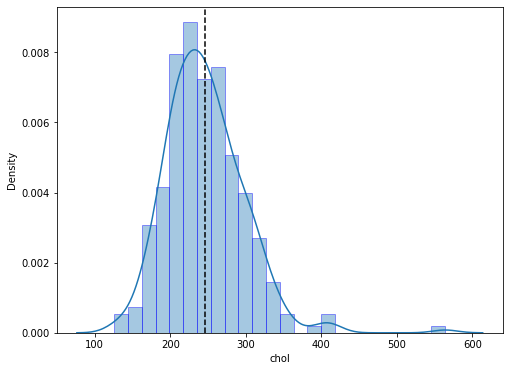

In [14]:
x ,y=plt.subplots(figsize =(8,6))
sns.distplot(data["chol"], hist_kws =dict(linewidth =1,edgecolor ="b"),ax =y)
y.axvline(data["chol"].mean(),color ="k",ls="--")

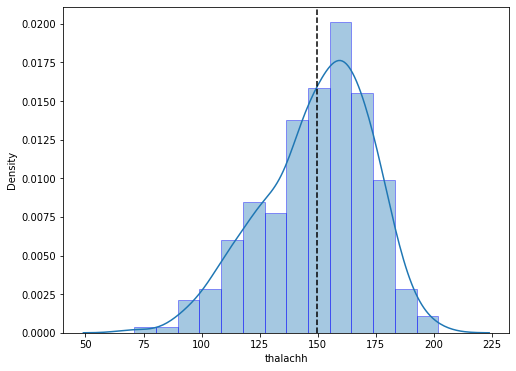

In [15]:
x ,y=plt.subplots(figsize =(8,6))
sns.distplot(data["thalachh"], hist_kws =dict(linewidth =1,edgecolor ="b"),ax =y)
y.axvline(data["thalachh"].mean(),color ="k",ls="--")

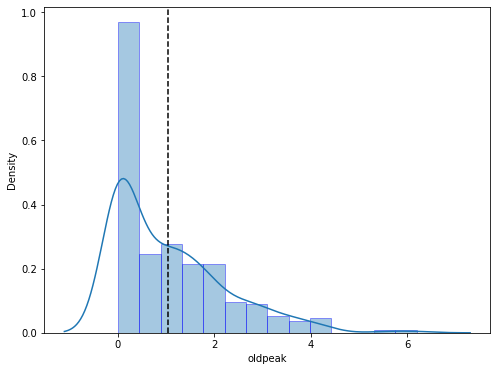

In [16]:
x ,y=plt.subplots(figsize =(8,6))
sns.distplot(data["oldpeak"], hist_kws =dict(linewidth =1,edgecolor ="b"),ax =y)
y.axvline(data["oldpeak"].mean(),color ="k",ls="--")

##### 4.1.2 catagorical  variable pie chart analysis<a id =16></a>

In [17]:
cat_var

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

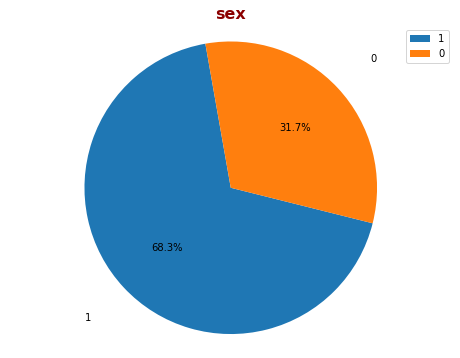

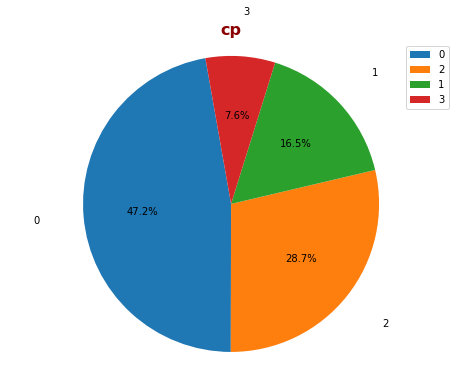

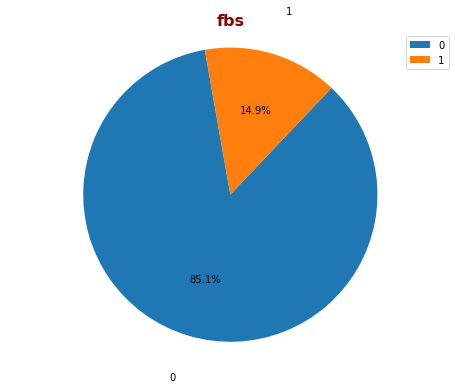

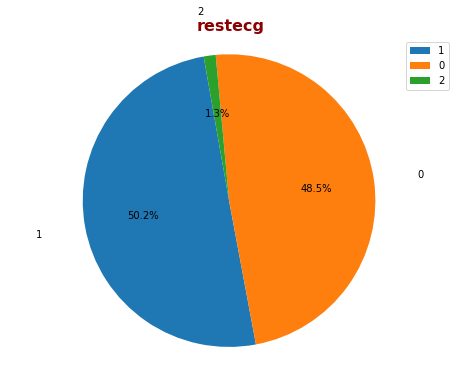

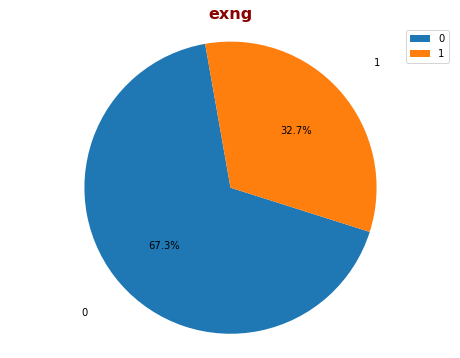

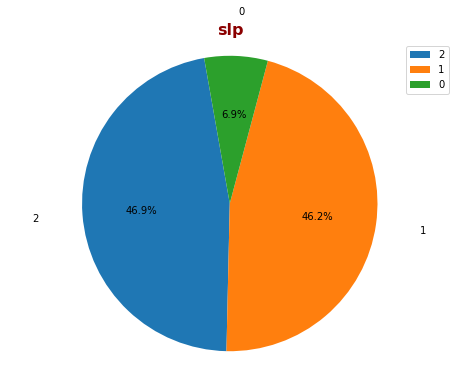

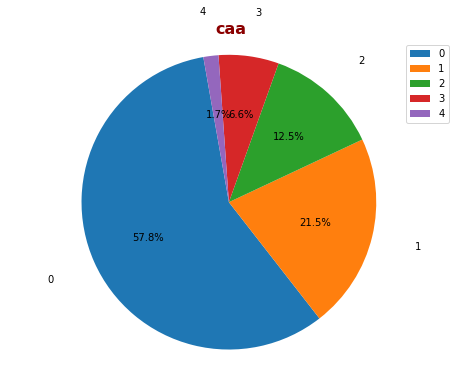

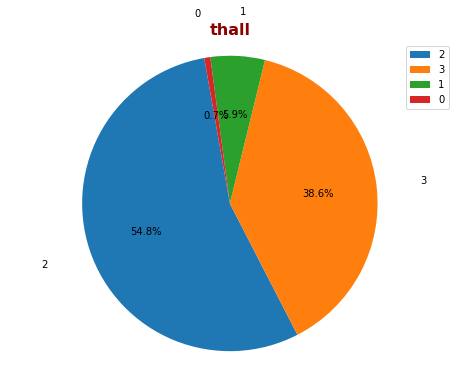

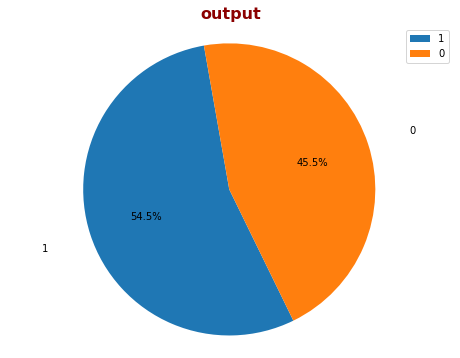

In [18]:
title_font ={"family":"arial","color":"darkred","weight":"bold","size":16}
axis_font ={"family":"arial","color":"darkblue","weight":"bold","size":12}

for i in cat_var:
    fig, ax =plt.subplots(figsize =(8,6))
    index = list(data[i].value_counts().index)
    value = list(data[i].value_counts())
    ax.pie(value ,labels =index ,autopct ='%1.1f%%',startangle =100,labeldistance =1.3)
    ax.axis("equal")
    plt.title(i,fontdict =title_font)
    plt.legend()
    plt.show()

In [19]:
# thal have 2 value as so i am replacing 0 with 2
data['thall'] = data['thall'].replace(0,2)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 4.2 Bi-variate analysis<a id =17></a>

##### 4.2.1 numeric-output variable Corelation analysis<a id =18></a>

In [20]:
num_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [21]:
num_var.append("output")
num_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

In [22]:
data[num_var].corr()

,age,trtbps,chol,thalachh,oldpeak,output
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
output,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [23]:
data[num_var].corr().iloc[:,[-1]]

,output
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalachh,0.421741
oldpeak,-0.430696
output,1.000000


#### as we can see that chol has vary low corelation with output.we only we feathurs with high corelared with output.

##### 4.2.2 categorical - output variable count plot analysis<a id = 19></a>

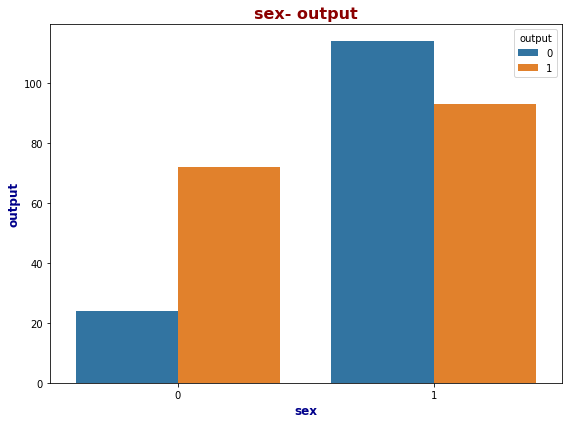

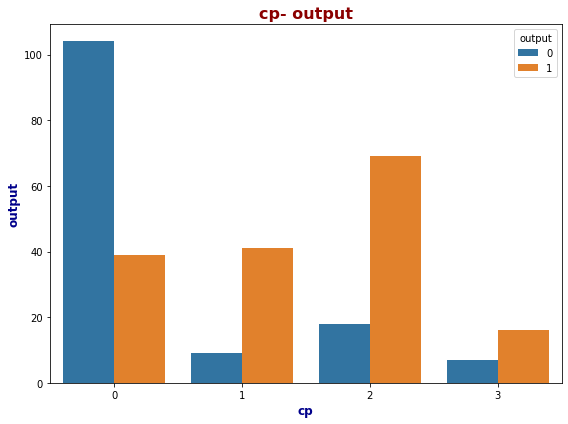

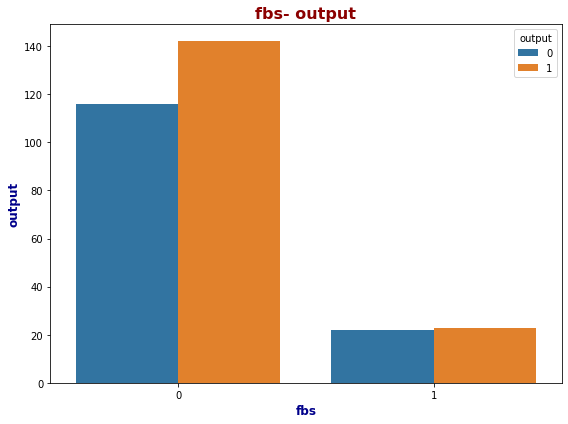

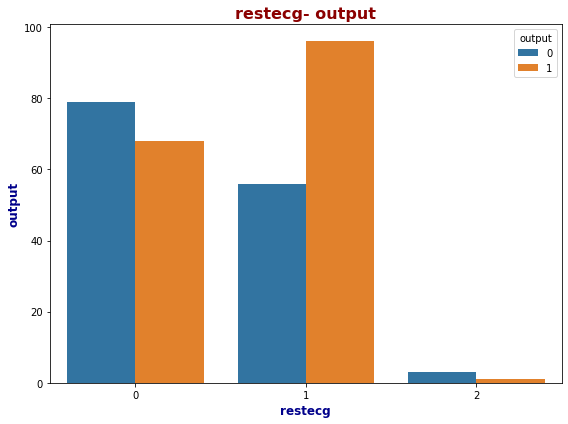

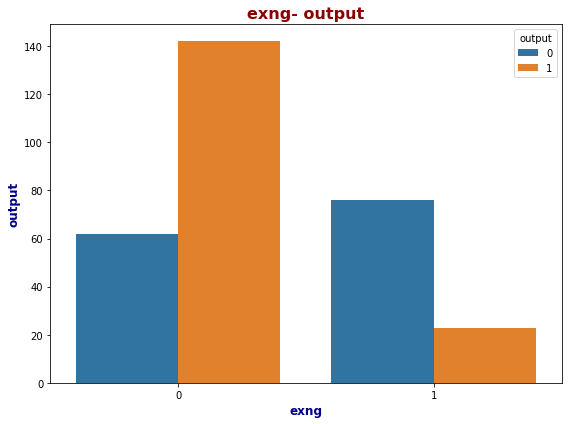

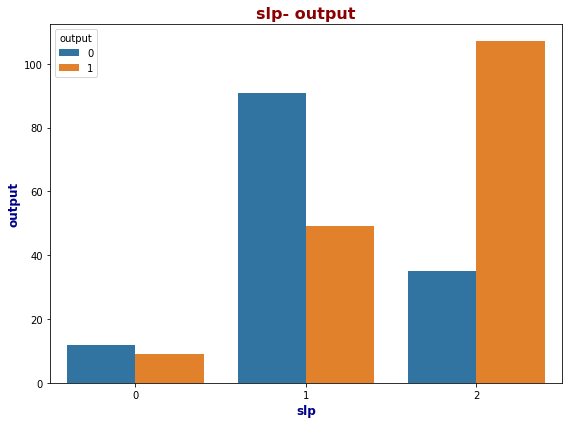

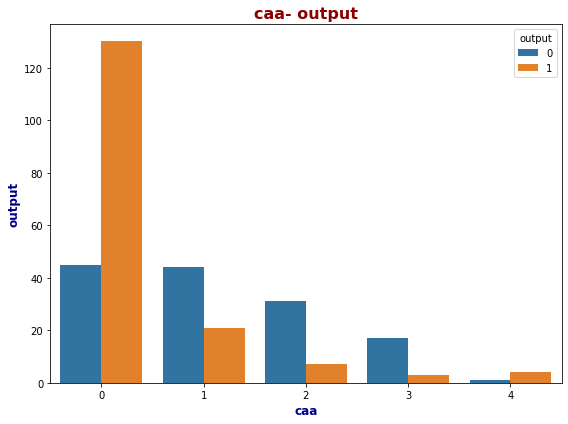

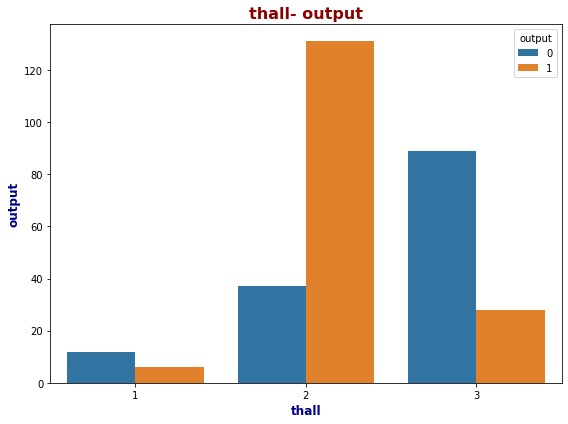

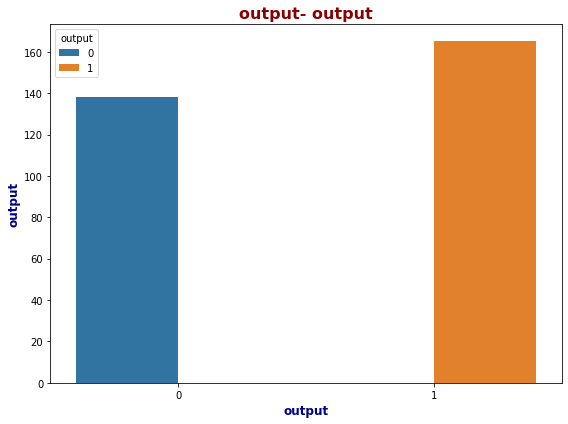

In [24]:
title_font ={"family":"arial","color":"darkred","weight":"bold","size":16}
axis_font ={"family":"arial","color":"darkblue","weight":"bold","size":12}

for i in cat_var:
    plt.figure(figsize =(8,6))
    sns.countplot(i, data =data[cat_var],hue ="output")
    
    plt.title(i +"- output",fontdict =title_font)
    plt.ylabel("output", fontdict =axis_font)
    plt.xlabel(i, fontdict =axis_font)
    plt.tight_layout()
    plt.show()

In [25]:
data[cat_var].corr().iloc[:,[-1]]

,output
sex,-0.280937
cp,0.433798
fbs,-0.028046
restecg,0.137230
exng,-0.436757
slp,0.345877
caa,-0.391724
thall,-0.363322
output,1.000000


##### 4.2.3 Examining corrrelation among the numerical features with pair plot<a id =20></a>

In [26]:
num_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

In [27]:
num_var.remove("output")
num_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

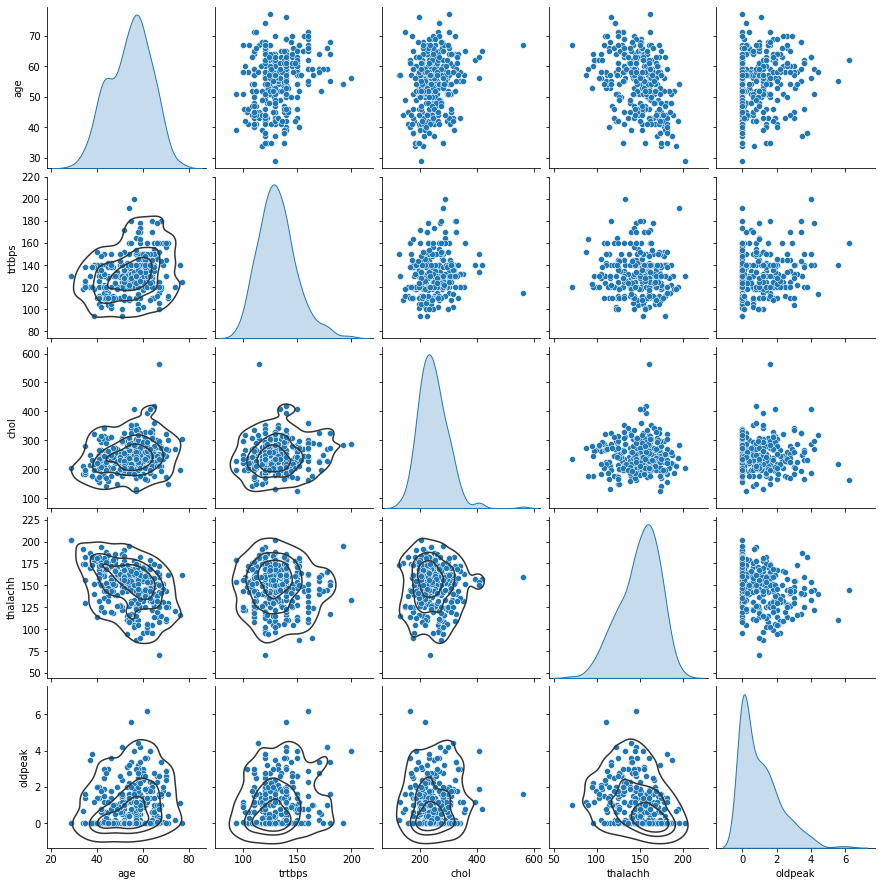

In [28]:
plot =sns.pairplot(data[num_var],diag_kind="kde")
plot.map_lower(sns.kdeplot , levels=4 ,color =".2")
plt.show()

##### 4.2.4 Feature Scaling with roustscaler method<a id =21></a>

In [29]:
from sklearn.preprocessing import RobustScaler
rob_scaler =RobustScaler()

In [30]:
scaled_data =rob_scaler.fit_transform(data[num_var])
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [31]:
data_new = pd.DataFrame(scaled_data, columns = num_var)
data_new

,age,trtbps,chol,thalachh,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250
...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750
299,-0.740741,-1.00,0.377953,-0.646154,0.2500
300,0.962963,0.70,-0.740157,-0.369231,1.6250
301,0.148148,0.00,-1.716535,-1.169231,0.2500


##### 4.2.5 Creating new dataFrame with melt function<a id =22></a>

In [32]:
new_data = pd.concat([data_new , data.loc[:,"output"]], axis =1)
new_data.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1


In [33]:
melt_data = pd.melt(new_data , id_vars ="output" ,var_name ="variable" , value_name ="value")
melt_data

,output,variable,value
0,1,age,0.592593
1,1,age,-1.333333
2,1,age,-1.037037
3,1,age,0.074074
4,1,age,0.148148
...,...,...,...
1510,0,oldpeak,-0.375000
1511,0,oldpeak,0.250000
1512,0,oldpeak,1.625000
1513,0,oldpeak,0.250000


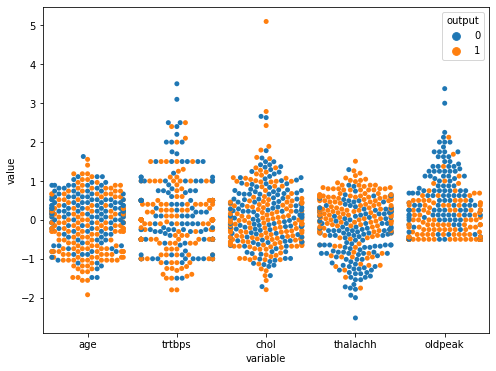

In [34]:
plt.figure(figsize =(8,6))
sns.swarmplot(x = "variable",y ="value",hue ="output", data= melt_data)
plt.show()

##### 4.2.6 Numerical - Catagorical variable analysis with swarmplot<a id =23></a>

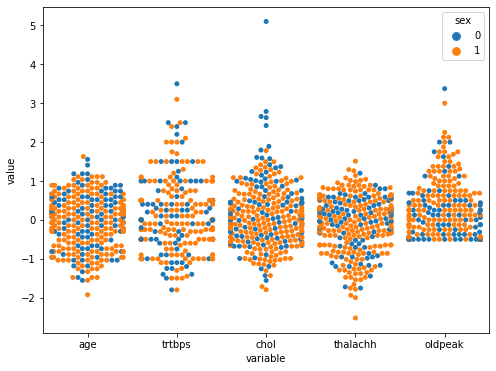

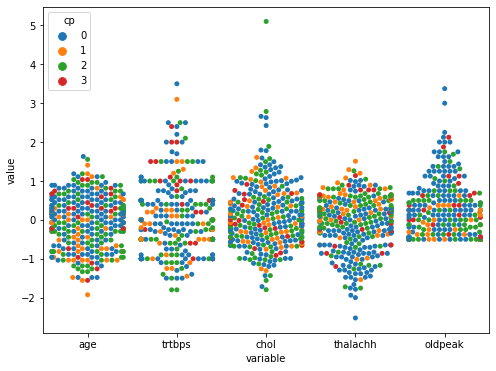

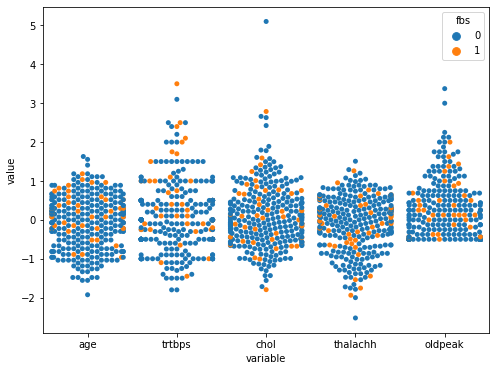

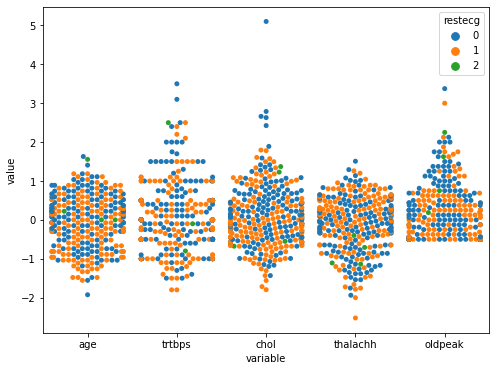

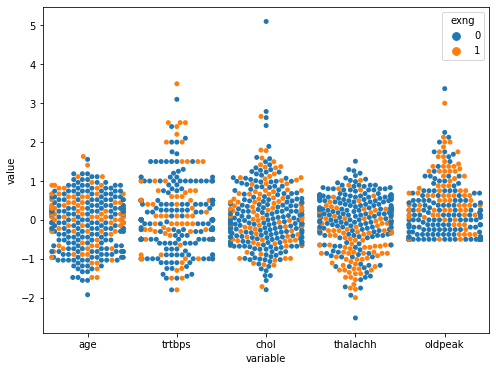

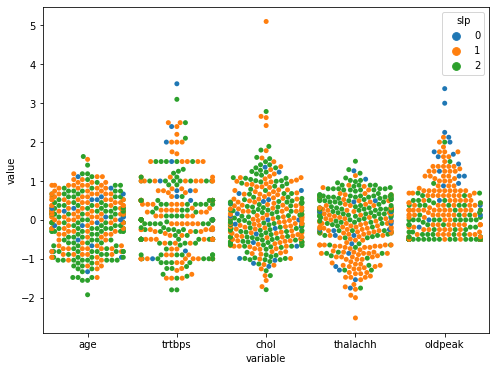

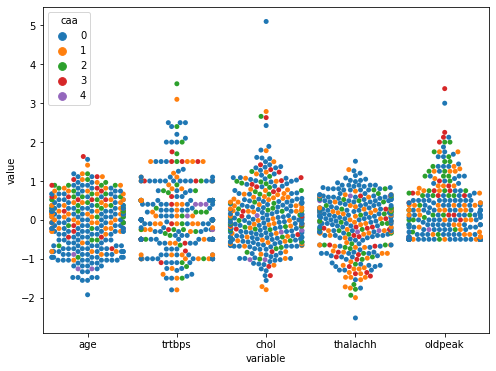

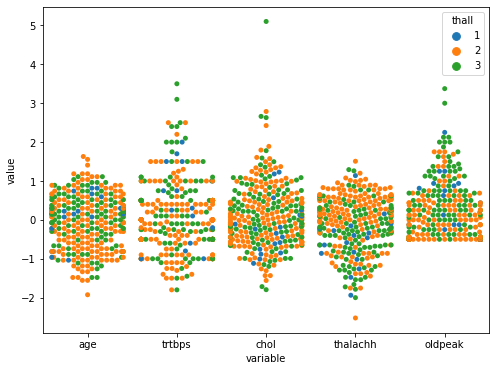

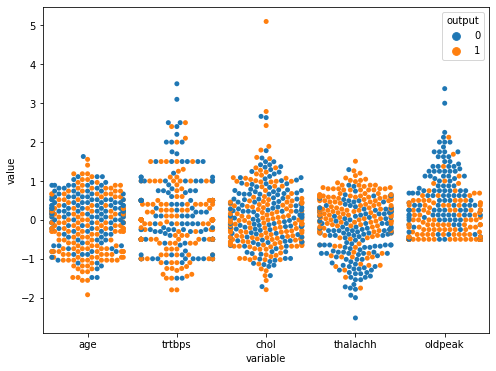

In [35]:
for i in data[cat_var]:
    new_data = pd.concat([data_new , data.loc[:,i]], axis =1)
    melt_data = pd.melt(new_data , id_vars =i ,var_name ="variable" , value_name ="value")
    plt.figure(figsize =(8,6))
    sns.swarmplot(x = "variable",y ="value",hue =i, data= melt_data)
    plt.show()

##### 4.2.7 Numerical - Catagorical variable analysis with boxplot<a id =24></a>

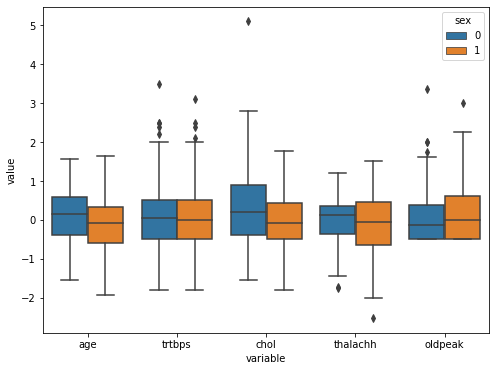

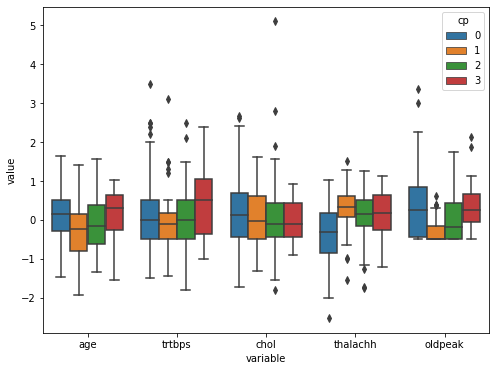

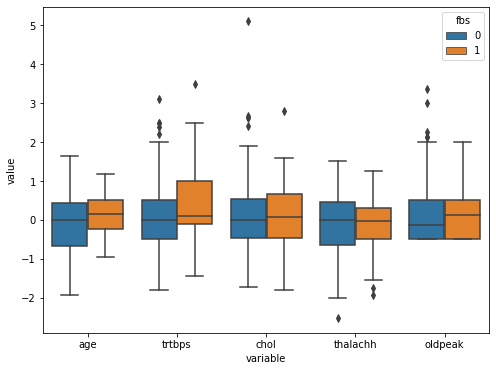

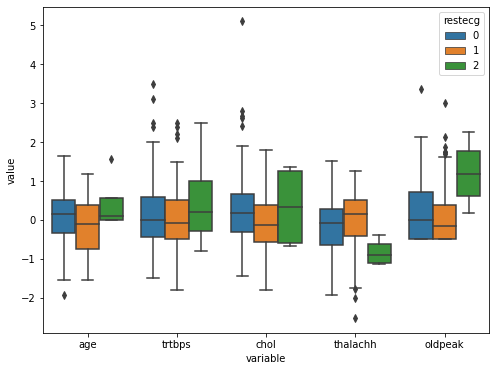

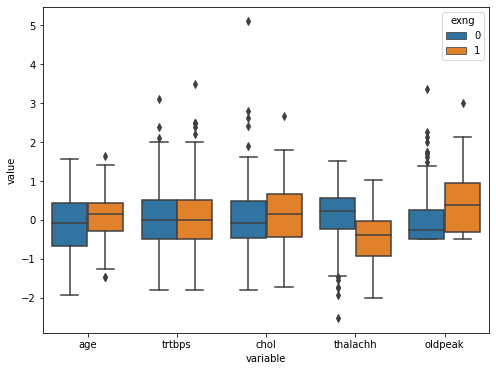

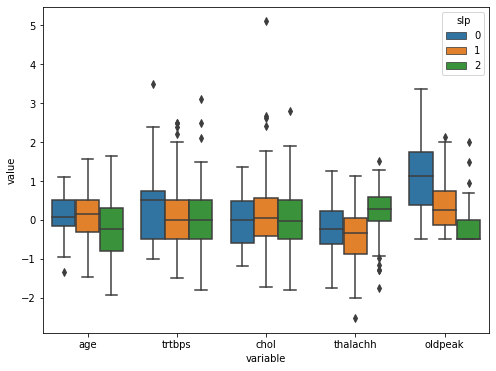

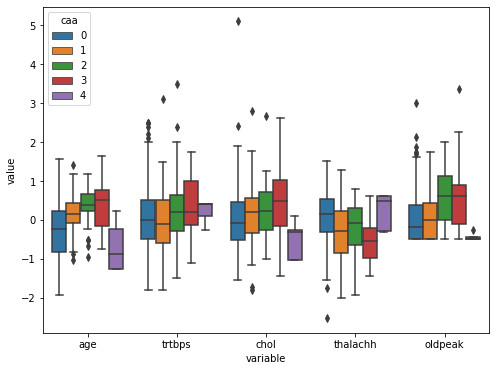

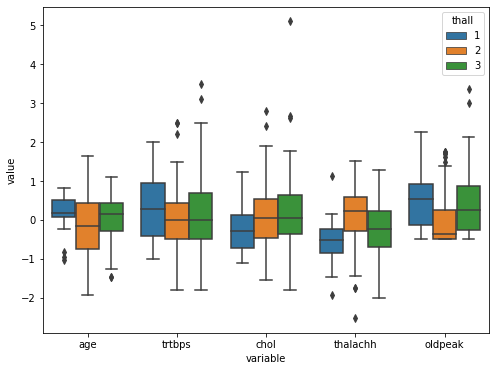

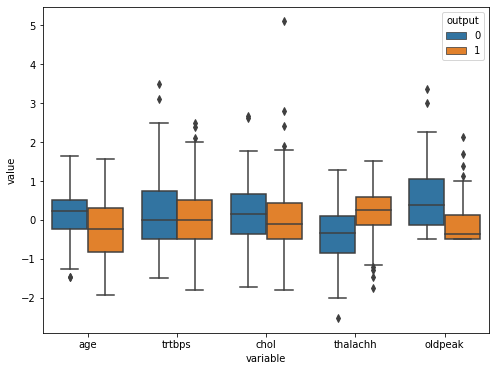

In [36]:
for i in data[cat_var]:
    new_data = pd.concat([data_new , data.loc[:,i]], axis =1)
    melt_data = pd.melt(new_data , id_vars =i ,var_name ="variable" , value_name ="value")
    plt.figure(figsize =(8,6))
    sns.boxplot(x = "variable",y ="value",hue =i, data= melt_data)
    plt.show()

##### 4.2.8 Relation between allvariable with heatmap analysis<a id = 25></a>

In [37]:
data_new.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


In [38]:
new_data2 =pd.concat([data_new , data[cat_var]],axis =1)
new_data2

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,3,1,0,0,0,0,1,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,2,0,1,0,0,0,2,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,2,0,2,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,1,0,2,0,2,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750,0,0,0,1,1,1,0,3,0
299,-0.740741,-1.00,0.377953,-0.646154,0.2500,1,3,0,1,0,1,0,3,0
300,0.962963,0.70,-0.740157,-0.369231,1.6250,1,0,1,1,0,1,2,3,0
301,0.148148,0.00,-1.716535,-1.169231,0.2500,1,0,0,1,1,1,1,3,0


<AxesSubplot:>

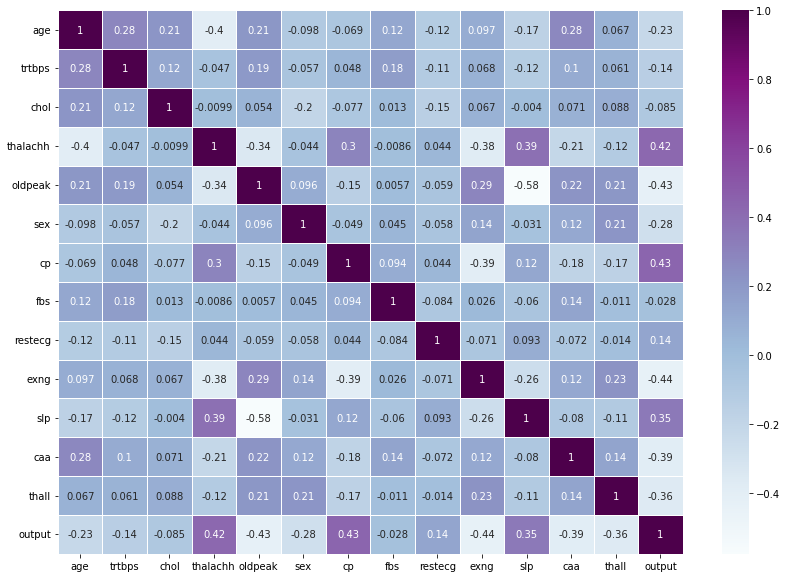

In [39]:
plt.figure(figsize =(14,10))
sns.heatmap(data =new_data2.corr() ,linewidths =0.5, cmap ="BuPu",annot =True)

### 5 Preparation for modelling<a id =26></a>

#### 5.1 droping columns with low corelation<a id =27></a>

In [40]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
data.drop(["chol","fbs","restecg"],inplace =True ,axis =1)
data.head()

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,150,0,2.3,0,0,1,1
1,37,1,2,130,187,0,3.5,0,0,2,1
2,41,0,1,130,172,0,1.4,2,0,2,1
3,56,1,1,120,178,0,0.8,2,0,2,1
4,57,0,0,120,163,1,0.6,2,0,2,1


#### 5.2 handling with outliear<a id = 28></a>

Text(0.5, 1.0, 'oldpeak')

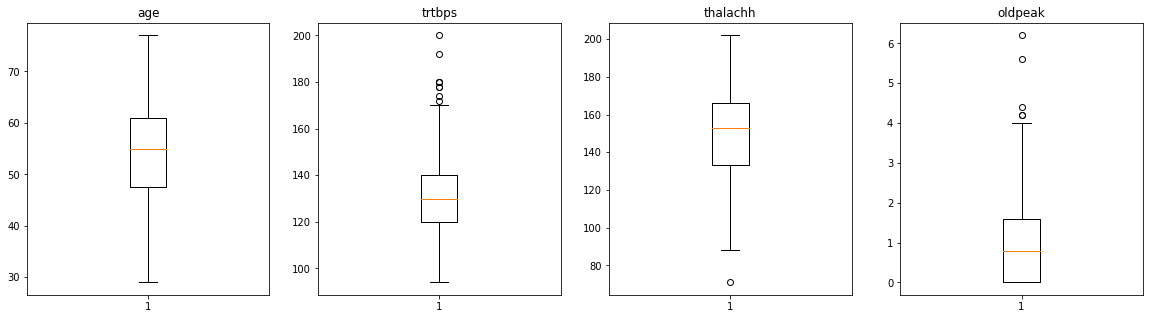

In [42]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize =(20,5))
ax1.boxplot(data["age"])
ax1.set_title("age")
ax2.boxplot(data["trtbps"])
ax2.set_title("trtbps")
ax3.boxplot(data["thalachh"])
ax3.set_title("thalachh")
ax4.boxplot(data["oldpeak"])
ax4.set_title("oldpeak")

In [43]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [44]:
def out(df , var):
    q1 =np.quantile(df[var],0.25)
    q3 =np.quantile(df[var],0.75)
    diff =q3 -q1
    lower_v =q1 -(1.5*diff)
    upper_v =q3 +(1.5*diff)
    return df[(df[var]<lower_v) | (df[var]>upper_v)]

In [45]:
trtbps_out = out(data,"trtbps")
trtbps_out

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output
8,52,1,2,172,162,0,0.5,2,0,3,1
101,59,1,3,178,145,0,4.2,0,0,3,1
110,64,0,0,180,154,1,0.0,2,0,2,1
203,68,1,2,180,150,1,1.6,1,0,3,0
223,56,0,0,200,133,1,4.0,0,2,3,0
241,59,0,0,174,143,1,0.0,1,0,2,0
248,54,1,1,192,195,0,0.0,2,1,3,0
260,66,0,0,178,165,1,1.0,1,2,3,0
266,55,0,0,180,117,1,3.4,1,0,2,0


In [46]:
data[data["trtbps"]<170].trtbps.max()

165

In [47]:
per_trtbps = (stats.percentileofscore(data["trtbps"], 165))/100
print(per_trtbps)

0.957095709570957


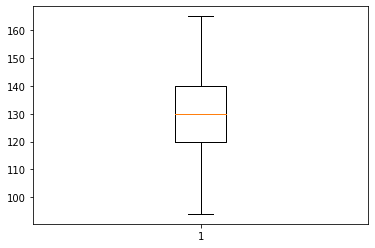

In [48]:
trtbps_wins =winsorize(data.trtbps,(0,(1-per_trtbps)))
plt.boxplot(trtbps_wins)
plt.show()

In [49]:
data["trtbps_wins"] =trtbps_wins
data.drop(["trtbps"],inplace =True ,axis =1)
data.head()

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output,trtbps_wins
0,63,1,3,150,0,2.3,0,0,1,1,145
1,37,1,2,187,0,3.5,0,0,2,1,130
2,41,0,1,172,0,1.4,2,0,2,1,130
3,56,1,1,178,0,0.8,2,0,2,1,120
4,57,0,0,163,1,0.6,2,0,2,1,120


In [50]:
thalachh_out = out(data,"thalachh")
thalachh_out

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output,trtbps_wins
272,67,1,0,71,0,1.0,1,0,2,0,120


In [51]:
data.drop([272],inplace = True ,axis =0)

In [52]:
oldpeak_out = out(data,"oldpeak")
oldpeak_out

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output,trtbps_wins
101,59,1,3,145,0,4.2,0,0,3,1,165
204,62,0,0,145,0,6.2,0,3,3,0,160
221,55,1,0,111,1,5.6,0,0,3,0,140
250,51,1,0,122,1,4.2,1,3,3,0,140
291,58,1,0,140,0,4.4,0,3,1,0,114


In [53]:
data[data["oldpeak"]<4.2].oldpeak.max()

4.0

0.9801324503311258


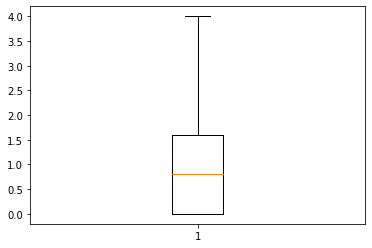

In [54]:
per_oldpeak = (stats.percentileofscore(data["oldpeak"], 4))/100
print(per_oldpeak)
oldpeak_wins =winsorize(data.oldpeak,(0,(1-per_oldpeak)))
plt.boxplot(oldpeak_wins)
plt.show()

In [55]:
data["oldpeak_wins"] =oldpeak_wins
data.drop(["oldpeak"],inplace =True ,axis =1)
data.head()

,age,sex,cp,thalachh,exng,slp,caa,thall,output,trtbps_wins,oldpeak_wins
0,63,1,3,150,0,0,0,1,1,145,2.3
1,37,1,2,187,0,0,0,2,1,130,3.5
2,41,0,1,172,0,2,0,2,1,130,1.4
3,56,1,1,178,0,2,0,2,1,120,0.8
4,57,0,0,163,1,2,0,2,1,120,0.6


#### 5.3 Transformation operation on unsymmetrical data<a id =29></a>

Text(0.5, 1.0, 'oldpeak_wins')

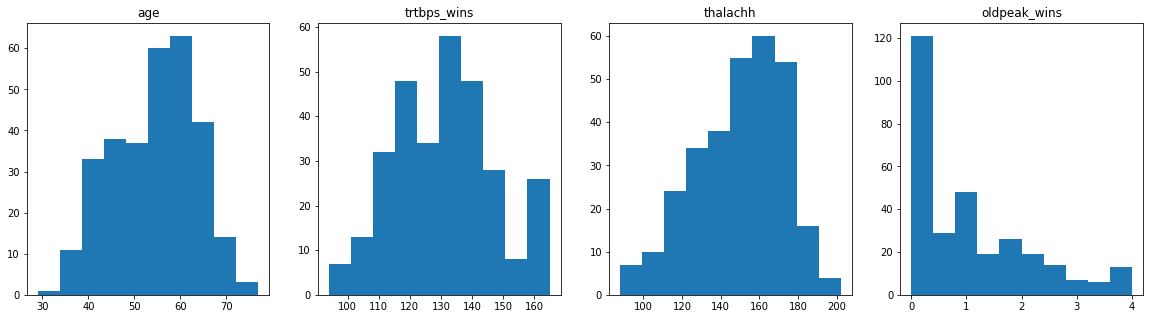

In [56]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize =(20,5))
ax1.hist(data["age"])
ax1.set_title("age")
ax2.hist(data["trtbps_wins"])
ax2.set_title("trtbps_wins")
ax3.hist(data["thalachh"])
ax3.set_title("thalachh")
ax4.hist(data["oldpeak_wins"])
ax4.set_title("oldpeak_wins")

In [57]:
data[["age","trtbps_wins","thalachh","oldpeak_wins"]].agg(["skew"]).transpose()

,skew
age,-0.199209
trtbps_wins,0.251969
thalachh,-0.461611
oldpeak_wins,0.996036


In [58]:
data["oldpeak_wins_log"] =np.log(data["oldpeak_wins"])
data["oldpeak_wins_sqrt"] =np.sqrt(data["oldpeak_wins"])
data.head()

,age,sex,cp,thalachh,exng,slp,caa,thall,output,trtbps_wins,oldpeak_wins,oldpeak_wins_log,oldpeak_wins_sqrt
0,63,1,3,150,0,0,0,1,1,145,2.3,0.832909,1.516575
1,37,1,2,187,0,0,0,2,1,130,3.5,1.252763,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.4,0.336472,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.8,-0.223144,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.6,-0.510826,0.774597


In [59]:
data[["oldpeak_wins","oldpeak_wins_log","oldpeak_wins_sqrt"]].agg(["skew"]).transpose()

,skew
oldpeak_wins,0.996036
oldpeak_wins_log,NaN
oldpeak_wins_sqrt,0.108926


In [60]:
data.drop(["oldpeak_wins","oldpeak_wins_log"],axis =1,inplace =True)
data.head()

,age,sex,cp,thalachh,exng,slp,caa,thall,output,trtbps_wins,oldpeak_wins_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


#### 5.4 One hotencoding on categorical variable<a id = 30></a>

In [61]:
cat_var.remove('fbs')
cat_var.remove('restecg')
cat_var

['sex', 'cp', 'exng', 'slp', 'caa', 'thall', 'output']

In [62]:
data_copy =data.copy()
data_copy =pd.get_dummies(data_copy,columns =cat_var[:],drop_first =True)
data_copy.head()

,age,thalachh,trtbps_wins,oldpeak_wins_sqrt,sex_1,cp_1,cp_2,cp_3,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_2,thall_3,output_1
0,63,150,145,1.516575,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,37,187,130,1.870829,1,0,1,0,0,0,0,0,0,0,0,1,0,1
2,41,172,130,1.183216,0,1,0,0,0,0,1,0,0,0,0,1,0,1
3,56,178,120,0.894427,1,1,0,0,0,0,1,0,0,0,0,1,0,1
4,57,163,120,0.774597,0,0,0,0,1,0,1,0,0,0,0,1,0,1


#### 5.5 RobustScaling<a id = 31></a>

In [63]:
new_num_var =["age","thalachh","trtbps_wins","oldpeak_wins_sqrt"]
robus_scaler =RobustScaler()
data_copy[new_num_var] =robus_scaler.fit_transform(data_copy[new_num_var])
data_copy.head()

,age,thalachh,trtbps_wins,oldpeak_wins_sqrt,sex_1,cp_1,cp_2,cp_3,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_2,thall_3,output_1
0,0.581818,-0.095238,0.75,0.491851,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,-1.309091,1.079365,0.00,0.771913,1,0,1,0,0,0,0,0,0,0,0,1,0,1
2,-1.018182,0.603175,0.00,0.228308,0,1,0,0,0,0,1,0,0,0,0,1,0,1
3,0.072727,0.793651,-0.50,0.000000,1,1,0,0,0,0,1,0,0,0,0,1,0,1
4,0.145455,0.317460,-0.50,-0.094734,0,0,0,0,1,0,1,0,0,0,0,1,0,1


#### 5.6 Split data in train and tea<a id =32></a>

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X =data_copy.drop(["output"],axis=1)
y= data_copy[["output"]]

KeyError: "['output'] not found in axis"

In [ ]:
X_train ,X_test, y_train, y_test = train_test_split(X ,y ,test_size =0.15,random_state =20)

### 6 Modelling<a id = 33></a>

#### 6.1 Logestic regression<a id=34></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

In [ ]:
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

In [ ]:
scores = cross_val_score(log_reg ,X_test ,y_test ,cv =8)
scores.mean()

In [ ]:
plot_roc_curve(log_reg , X_test, y_test, name="Logistic Regression")
plt.title("Logistic Regression ROC Curve and AUC")
plt.plot([0,1],[0,1],"b--")
plt.show()

##### 6.1.1 Hyperparametertuning<a id=35></a>

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
log_reg_new = LogisticRegression()
param = {"penalty":["l1","l2"],"solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [ ]:
log_reg_grid = GridSearchCV(log_reg_new,param_grid =param)
log_reg_grid.fit(X_train,y_train)
log_reg_grid.best_params_

In [ ]:
log_reg_new2 = LogisticRegression(penalty= 'l1', solver = 'saga')
log_reg_new2.fit(X_train,y_train)
y_pred = log_reg_new2.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

In [ ]:
plot_roc_curve(log_reg_new2 , X_test, y_test, name="Logistic Regression Gridsearch")
plt.title("Logistic Regression ROC Curve and AUC")
plt.plot([0,1],[0,1],"b--")
plt.show()

#### 6.2 Decision Tree Classifier<a id =36></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

In [ ]:
dec_tree.fit(X_train,y_train)
y_pred = dec_tree.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

In [ ]:
scores = cross_val_score(dec_tree ,X_test ,y_test ,cv =8)
scores.mean()

In [ ]:
plot_roc_curve(dec_tree , X_test, y_test, name="DecisionTree Classifier")
plt.title("DecisionTree Classifier ROC Curve and AUC")
plt.plot([0,1],[0,1],"b--")
plt.show()

#### 6.3 Suport vector classifier<a id =37></a>

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

In [ ]:
scores = cross_val_score(svm ,X_test ,y_test ,cv =8)
scores.mean()

In [ ]:
plot_roc_curve(svm , X_test, y_test, name="SVC")
plt.title("SVC ROC Curve and AUC")
plt.plot([0,1],[0,1],"b--")
plt.show()

#### 6.4 Random Forest Classifier<a id =38></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

In [ ]:
scores = cross_val_score(rf ,X_test ,y_test ,cv =8)
scores.mean()

In [ ]:
plot_roc_curve(rf , X_test, y_test, name="RandomForestClassifier")
plt.title("RandomForestClassifier ROC Curve and AUC")
plt.plot([0,1],[0,1],"b--")
plt.show()

#### 7 Project conclusion<a id =39></a>

#### we carried out following activities in project:
1. we first prepare data for EDA.
2. we peformed EDA.
3. we check distrubution and correlation with various plot.
4. we made data set ready for modelling.
5. we got 84%accuracy and 90%AUC with Logistic regression.
6. we got 63%accuracy and 64%AUC with Decision tree model.
7. we got 78%accuracy and 88%AUC with support vector classifier.
8. we got 76%accuracy and 83%AUC with Random forest classifier.
9. when all these model outputs are evaluted we prefer the model we creted with the Logistic Regression which gives best result.